# Flight Price Dataset


In [1]:
import pandas as pd
df=pd.read_csv('flight_price.csv')
df.head()
shape=df.shape
print('Rows:',shape[0])
print('Columns:',shape[1])

Rows: 10683
Columns: 11


In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


<Axes: ylabel='Count'>

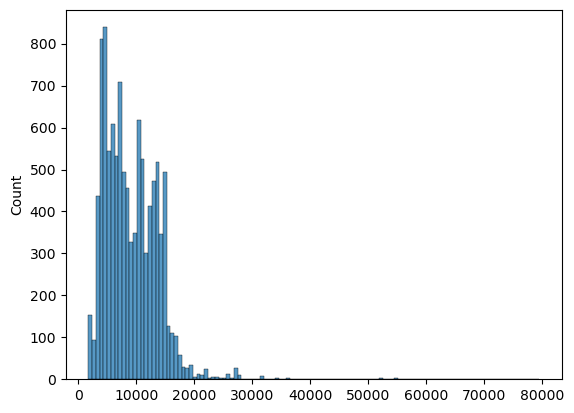

In [4]:
import seaborn as sns
val=df['Price'].values
sns.histplot(val)

In [5]:
min_price=min(val)
max_price=max(val)
print('Max price:',max_price,'Min price:',min_price)

Max price: 79512 Min price: 1759


<Axes: xlabel='Airline', ylabel='Price'>

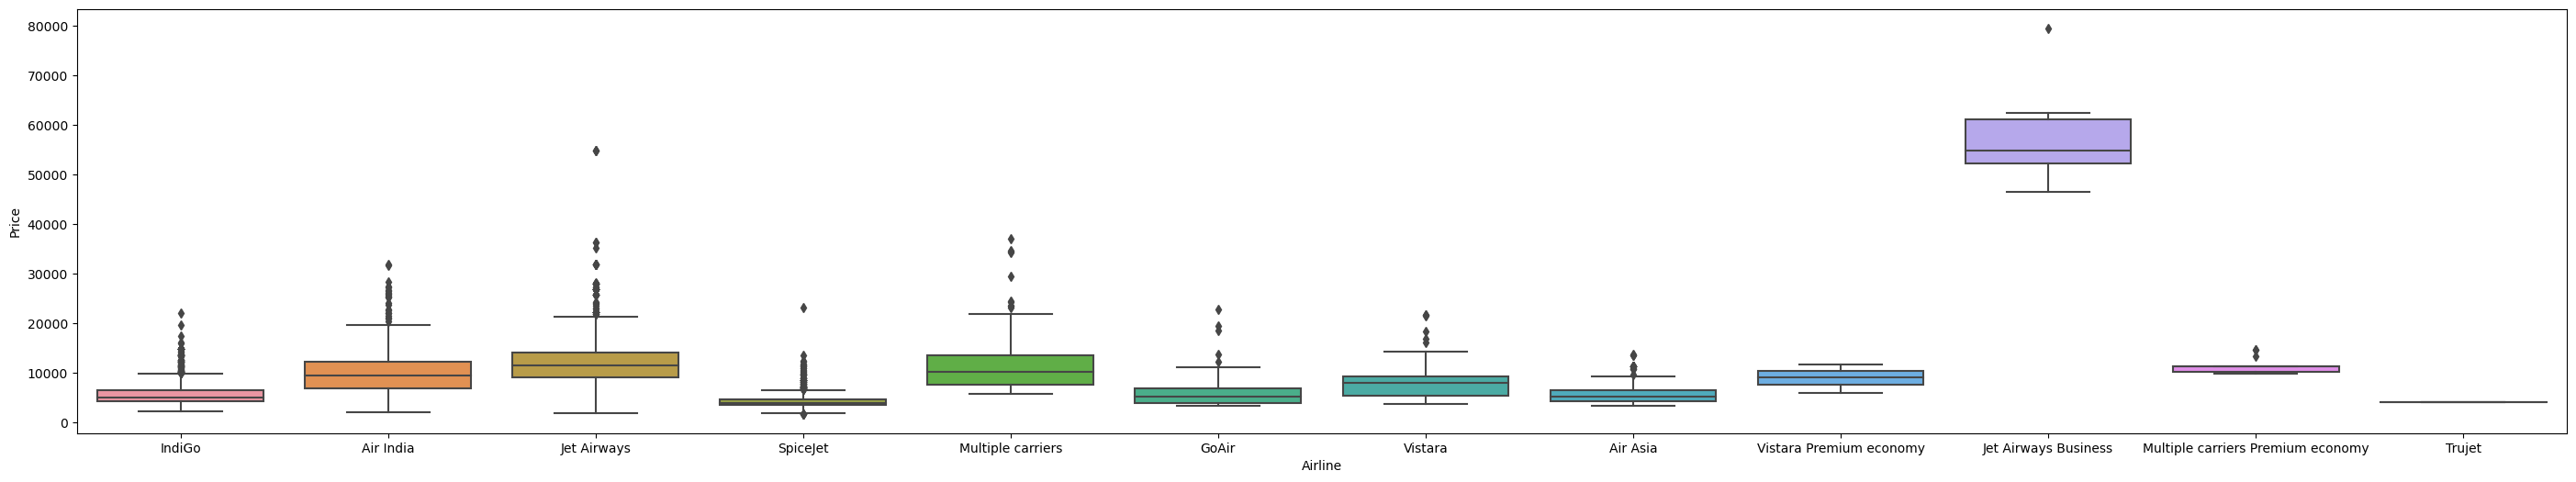

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[35,6])
sns.boxplot(x=df['Airline'],y=df['Price'])

In [7]:
#Yes there are outliers in the price of Jet airways business that may affect our inference of the data.

In [8]:
df_month=df['Date_of_Journey'].str.split('/').str[1]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]

In [9]:
df[df_month]=df_month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,03,05,06,04
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03,03,05,06,04
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,03,05,06,04
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06,03,05,06,04
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05,03,05,06,04
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03,03,05,06,04


<Axes: xlabel='Month', ylabel='Airline'>

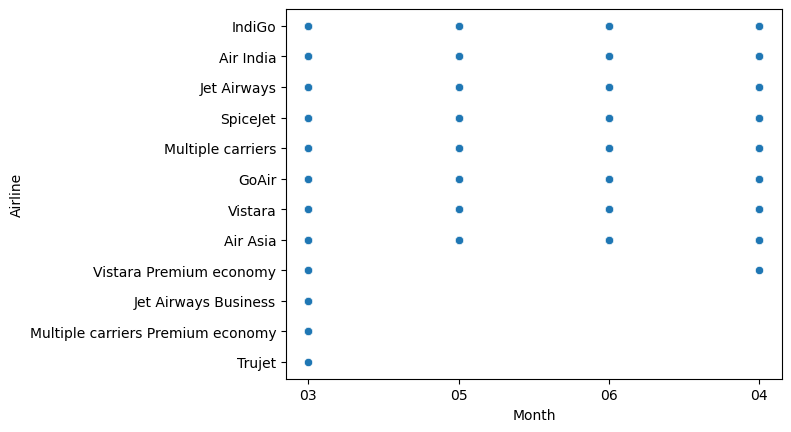

In [10]:
sns.scatterplot(y=df['Airline'],x=df['Month'])

In [11]:
#We see that in all of the airlines March month has most flights booked so it is the peak season.

<Axes: xlabel='Month', ylabel='Price'>

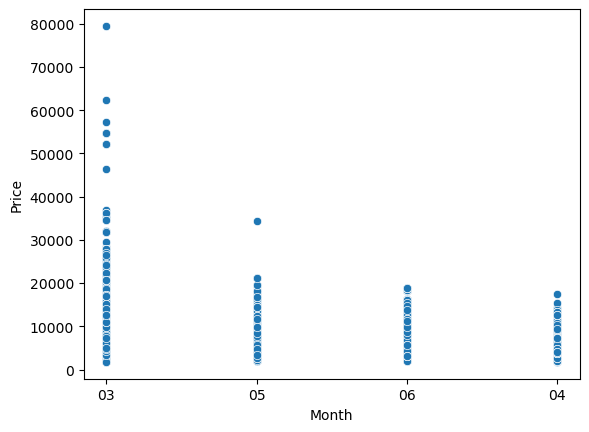

In [12]:
#7 and #8
sns.scatterplot(y=df['Price'],x=df['Month'])
#DATE OF JOURNEY:We see that in the third month Flight prices are comparaticely higher

<Axes: xlabel='Airline', ylabel='Price'>

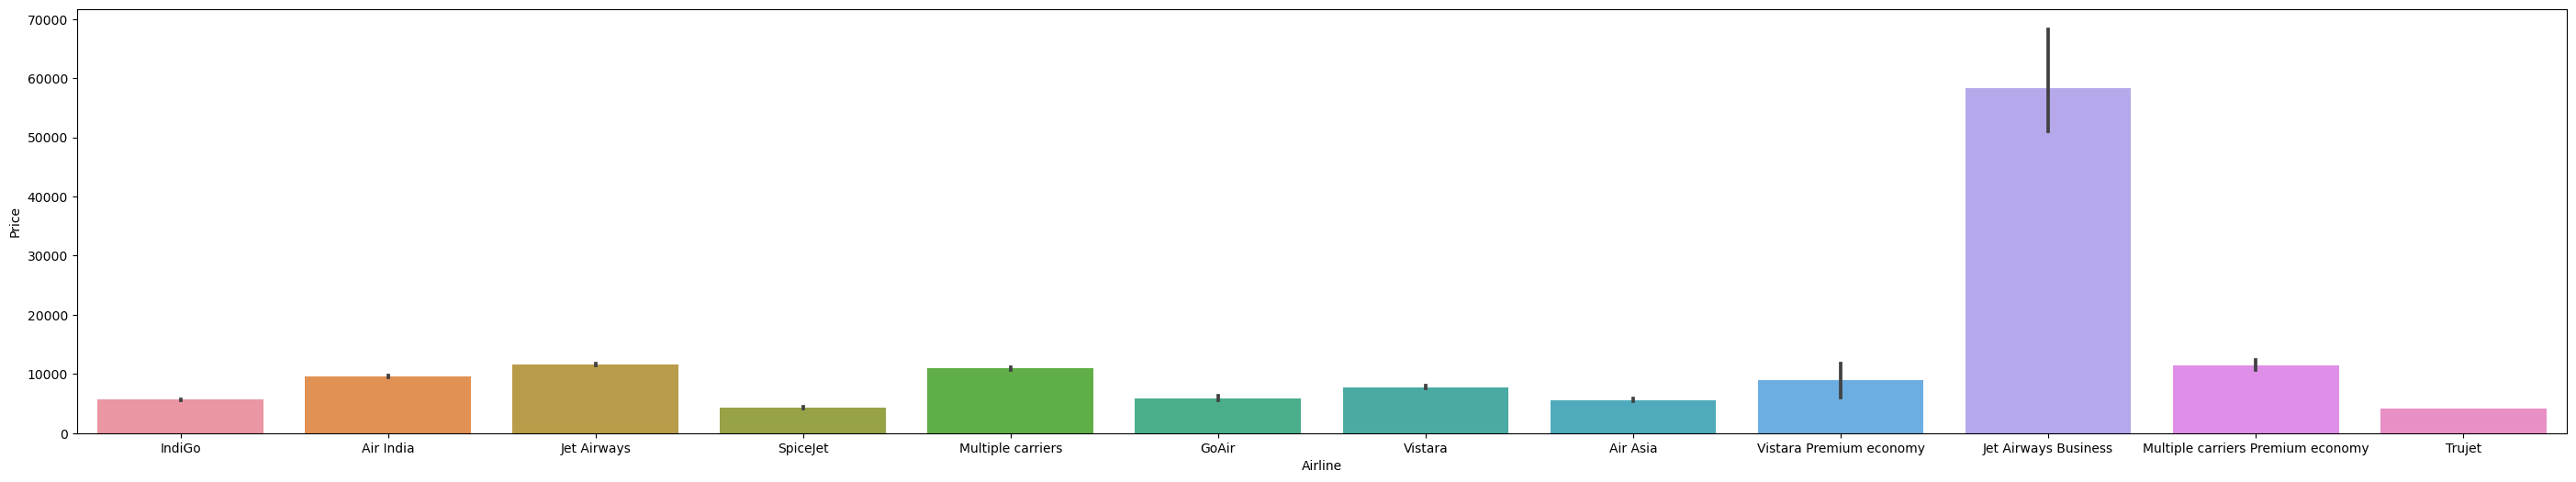

In [13]:
#AIRLINES:We see that jet airways business has the most expensive price
plt.figure(figsize=[35,6])
datas=df.groupby('Airline')['Price'].mean().reset_index()
sns.barplot(data=datas,x=df['Airline'],y=df['Price'])

<Axes: xlabel='Destination', ylabel='Price'>

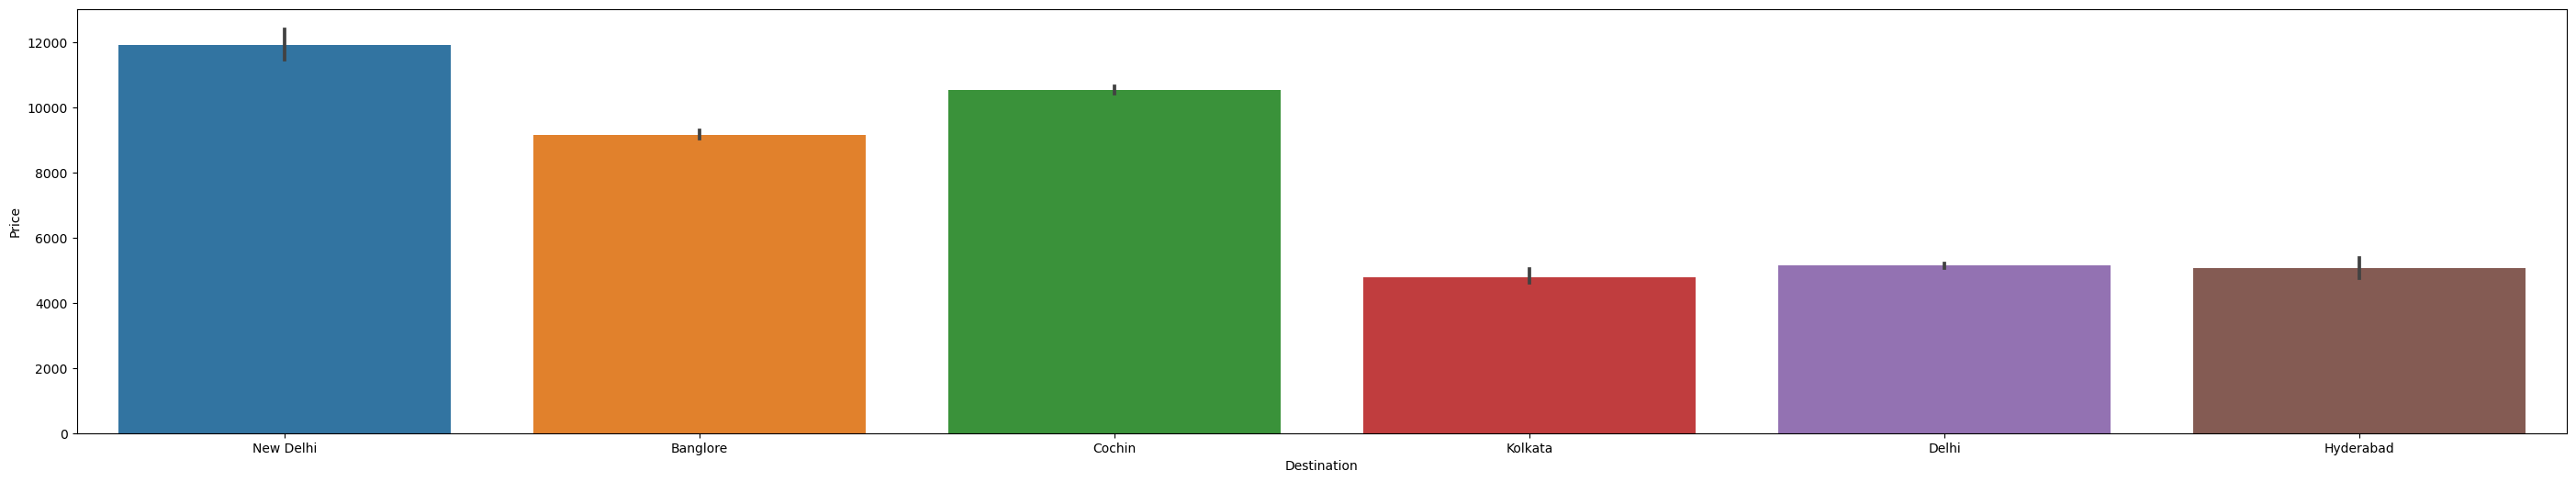

In [14]:
#Destination:We see that flights to New Delhi and Cochin has the most expensive price
plt.figure(figsize=[35,6])
datas=df.groupby('Destination')['Price'].mean().reset_index()
sns.barplot(data=datas,x=df['Destination'],y=df['Price'])

In [15]:
df['Route'].value_counts()

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: count, Length: 128, dtype: int64

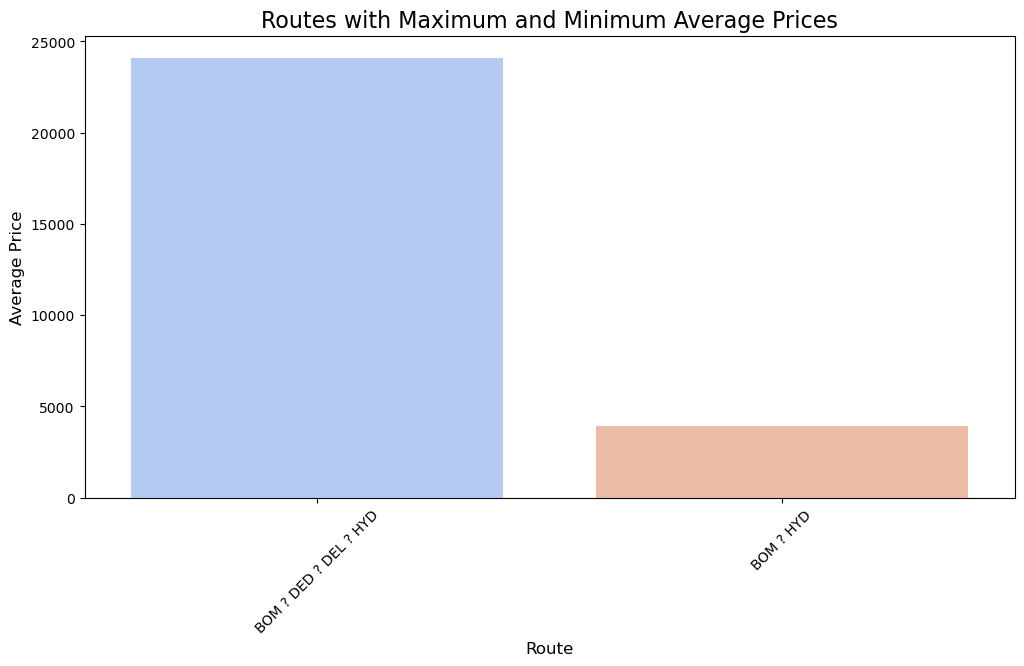

In [16]:
#Routes:We see the most expensive and least expensive route.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per route
datas = df.groupby('Route')['Price'].mean().reset_index()

# Find routes with maximum and minimum average prices
max_row = datas[datas['Price'] == datas['Price'].max()]
min_row = datas[datas['Price'] == datas['Price'].min()]

# Combine max and min rows into one DataFrame for plotting
extreme_prices = pd.concat([max_row, min_row])

# Plot the results
plt.figure(figsize=[12, 6])  # Adjust figure size
sns.barplot(data=extreme_prices, x='Route', y='Price', palette='coolwarm')

# Add title and labels
plt.title('Routes with Maximum and Minimum Average Prices', fontsize=16)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [17]:
df['Dep_Time'].values

array(['22:20', '05:50', '09:25', ..., '08:20', '11:30', '10:55'],
      dtype=object)

<Axes: xlabel='Time_morning', ylabel='Price'>

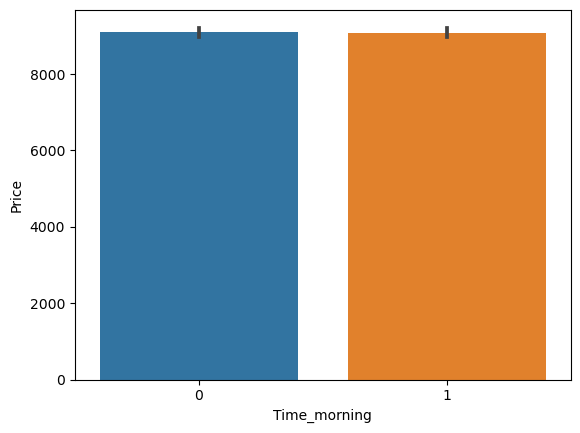

In [18]:
df['Time_morning'] = df['Dep_Time'].apply(lambda x: 1 if int(x.split(':')[0]) < 13 else 0)
sns.barplot(x=df['Time_morning'],y=df['Price'])
#Price for flights in the mrning and aternoon are same

# Google Playstore dataset

In [19]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
shape=df.shape
print('Rows:',shape[0])
print('Columns:',shape[1])

Rows: 10841
Columns: 13


In [20]:
df.head()
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='Rating'>

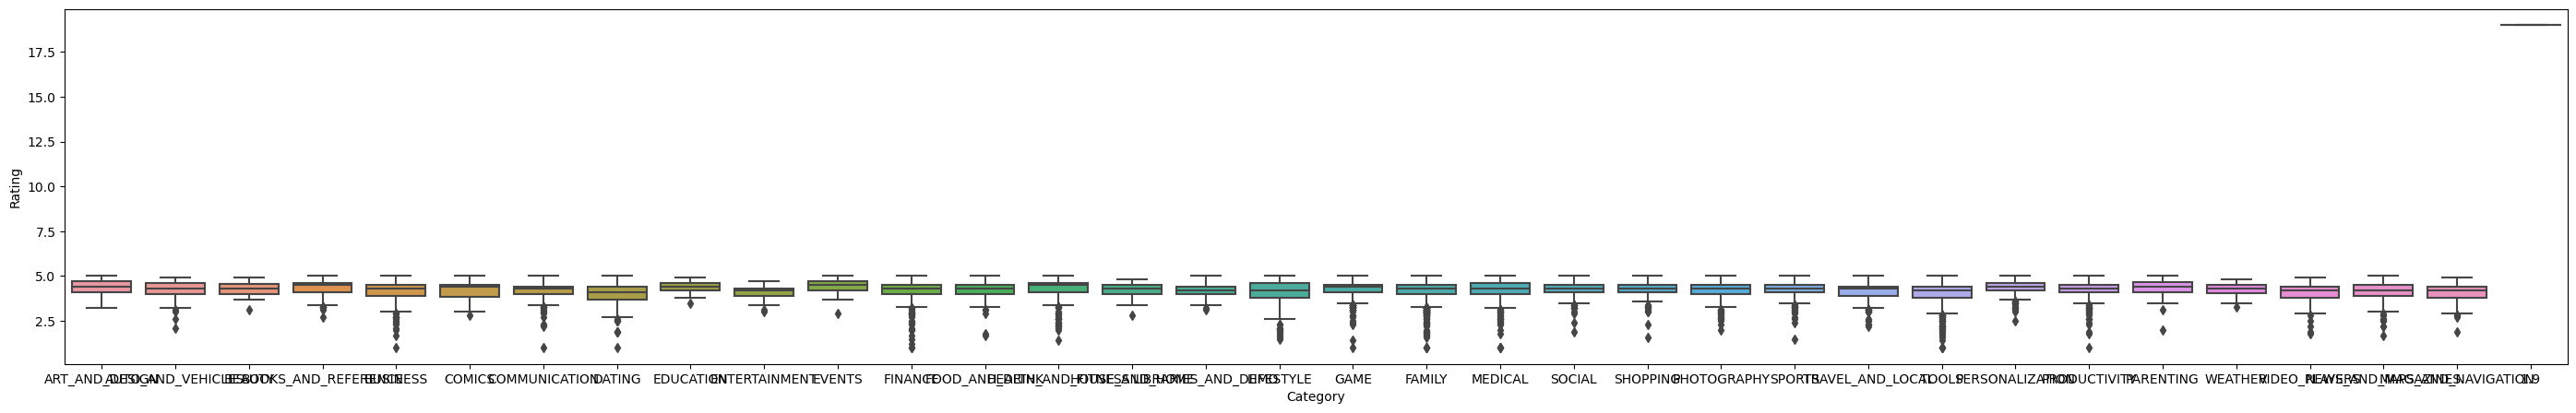

In [26]:
plt.figure(figsize=[35,5])
sns.boxplot(x=df['Category'],y=df['Rating'])


In [27]:
df.isnull().values.any().sum()

1

In [28]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [29]:
#Yes there are  missing values and it will lead to imbalanced dataset and impact my decisions

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: count, Length: 462, dtype: int64

<Figure size 10000x10000 with 0 Axes>

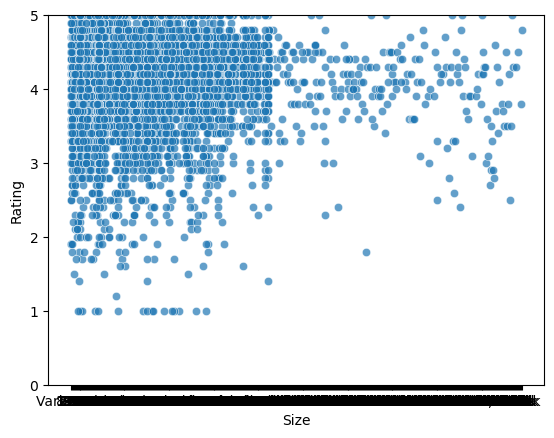

<Figure size 10000x10000 with 0 Axes>

In [32]:
sns.scatterplot(x=df['Size'],y=df['Rating'],alpha=0.7)
plt.ylim(0, 5)
plt.figure(figsize=[100,100])

In [33]:
#As size increases the ratings are less and scarce

In [34]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [35]:
df['Price'] = df['Price'].astype(str)
df['Price']=df['Price'].str.replace('$','',regex=True)
df['Price']=pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

In [36]:
df.dropna()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [37]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [38]:
df = df.dropna(subset=['App', 'Price'])


In [39]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df = df.dropna(subset=['Price'])


In [ ]:
import pandas as pd
freqtab=pd.crosstab(df['App'],'installs')
print(freqtab)

In [ ]:
#15 and 16
df['App'].value_counts()

In [ ]:
sns.barplot(x=df['App'],y=df['Rating'])